<a href="https://colab.research.google.com/github/sakshambatra1/stockpredictor/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb

In [ ]:
data = pd.read_csv('TSLA2.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3408,2024-01-12,220.080002,225.339996,217.149994,218.889999,218.889999,122889000
3409,2024-01-16,215.100006,223.490005,212.179993,219.910004,219.910004,115355000
3410,2024-01-17,214.860001,215.669998,212.009995,215.550003,215.550003,103164400
3411,2024-01-18,216.880005,217.449997,208.740005,211.880005,211.880005,108595400


<Axes: >

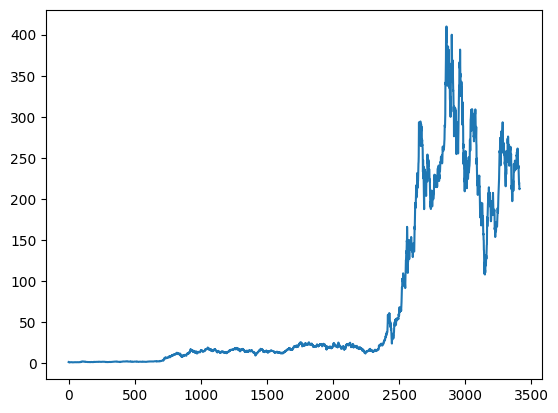

In [ ]:
#show the graph
data['Close'].plot()

In [ ]:
#split it into training or testing
train_data = data.iloc[:int(.95*len(data)), :]
test_data = data.iloc[int(.95*len(data)):, :]

In [ ]:
#define the features we want to keep, and the target var
features = ['Open', 'Volume']
target = 'Close'

In [ ]:
#Create and train the model
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[164.63914 164.3728  175.90334 176.16472 187.50394 185.25705 184.20392
 185.7619  190.83304 194.78828 192.26538 200.21223 218.70442 210.12303
 211.5796  219.61423 224.69232 251.12622 245.21544 248.84654 262.80997
 249.34448 271.55078 269.1961  270.9137  249.9564  259.78888 238.19447
 246.21114 249.03789 268.6805  254.21176 272.24612 285.85797 275.39655
 263.08688 272.24612 281.26978 271.77847 261.68005 272.24612 296.3634
 294.87802 280.6193  266.68445 288.87662 267.6399  275.9611  256.5845
 288.24353 253.16202 283.24048 277.31766 255.38493 233.63986 258.69815
 239.00029 239.66266 241.44597 249.49501 243.22539 233.14009 237.08778
 220.27924 232.76936 212.02844 231.631   255.30504 227.98509 234.20497
 230.6014  242.69559 253.85272 244.95816 257.5324  268.6805  257.5987
 250.48436 237.54655 237.45921 259.20334 303.75534 279.48126 284.30762
 280.07678 286.76636 261.8411  286.48395 257.47836 262.05075 241.22969
 244.51373 256.6114  230.39937 250.1898  243.73215 241.72845 

In [ ]:
print('Actual Values:')
print(test_data[target])

Actual Values:
3242    166.520004
3243    173.860001
3244    176.889999
3245    180.139999
3246    188.869995
           ...    
3408    218.889999
3409    219.910004
3410    215.550003
3411    211.880005
3412    212.190002
Name: Close, Length: 171, dtype: float64


In [ ]:
accuracy = model.score(test_data[features], test_data[target])
print('Accuracy:')
print(accuracy)
#results show the data is 82.2% accurate...

Accuracy:
0.8226688200633709


<function matplotlib.pyplot.show(close=None, block=None)>

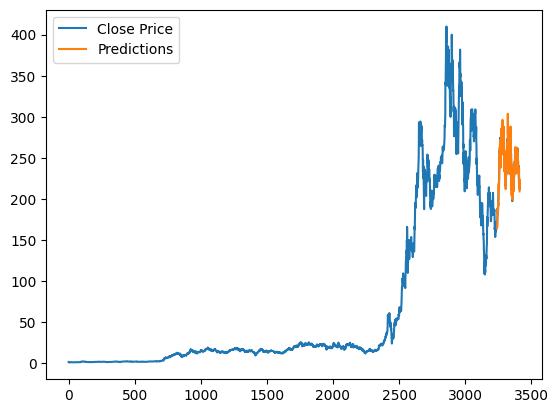

In [ ]:
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show